In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('../raw_data/zelle/4.jpg')

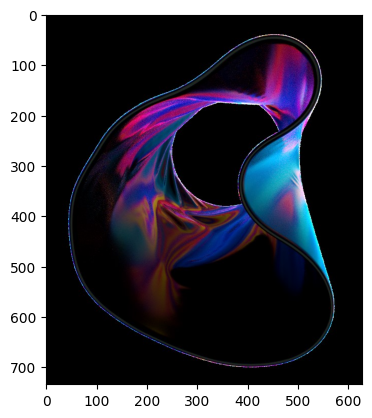

In [2]:
plt.imshow(img)

In [3]:
import os


def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img=mpimg.imread(os.path.join(foldername,filename))
        if img is not None:
            images.append(img)
    return images


In [4]:
imgs = load_images_from_folder('../raw_data/subset_test')

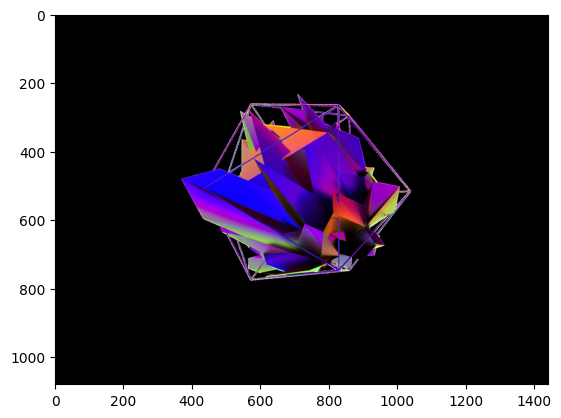

In [5]:
plt.imshow(imgs[1])

In [6]:
len(imgs)

110

In [7]:
imgs[0].shape

(1080, 1440, 3)

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

imgs=np.array(imgs)

X_train = imgs[55:] / 255
X_test = imgs[:55] / 255


def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(1080, 1440, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [36]:
encoder = build_encoder(latent_dimension=2)

In [37]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1079, 1439, 8)     104       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 539, 719, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 538, 718, 16)      528       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 269, 359, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 268, 358, 32)      2080      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 134, 179, 32)    

In [38]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose

def build_decoder(latent_dimension):
    # $CHALLENGIFY_BEGIN
    decoder = Sequential()
    
    decoder.add(Dense(7*7*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(Reshape((7, 7, 8)))  # no batch axis here
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(1, (2, 2), strides=2, padding='same', activation='relu'))
    return decoder

In [39]:
decoder = build_decoder(2)
decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 392)               1176      
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 8)        264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 1)        33        
 ranspose)                                                       
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

def build_autoencoder(encoder, decoder):
    inp = Input((1080, 1440, 3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

In [41]:
autoencoder = build_autoencoder(encoder, decoder)

In [42]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1080, 1440, 3)]   0         
                                                                 
 sequential_4 (Sequential)   (None, 2)                 1537818   
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 1)         1473      
                                                                 
Total params: 1,539,291
Trainable params: 1,539,291
Non-trainable params: 0
_________________________________________________________________


In [43]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [44]:
compile_autoencoder(autoencoder)

In [45]:
prediction=autoencoder.predict(X_train, verbose=0, batch_size = 32)

In [46]:
prediction


array([[[[1.4356076e-04],
         [6.0596631e-04],
         [1.2748726e-03],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [1.4316111e-03]],

        [[8.8269438e-04],
         [0.0000000e+00],
         [3.2511356e-04],
         ...,
         [0.0000000e+00],
         [2.8079475e-04],
         [4.9968992e-05]],

        ...,

        [[0.0000000e+00],
         [0.0000000e+00],
         [3.0042644e-04],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[3.4905452e-04],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.5755575e-03],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [4.0937343e-04],
         [0.0000000e+00],
         ...,
         [7.9716009e-04],
        

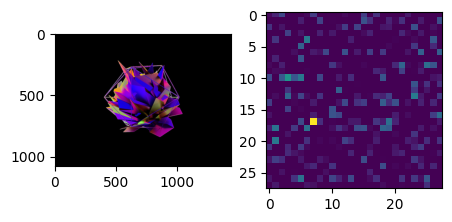

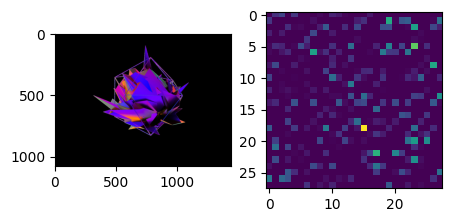

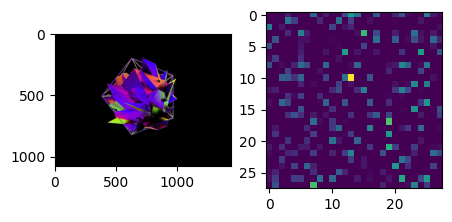

In [48]:
for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
    ax1.imshow(X_train[i])
    ax2.imshow(prediction[i])
    plt.show()